In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('datas/amazon_stock.csv')
display(data.head())
display(len(data))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
1,2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2,2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
3,2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
4,2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300


252

In [16]:
# minus 부호 출력 설정
plt.rcParams['axes.unicode_minus'] = False  


히스토그램

x축 기준

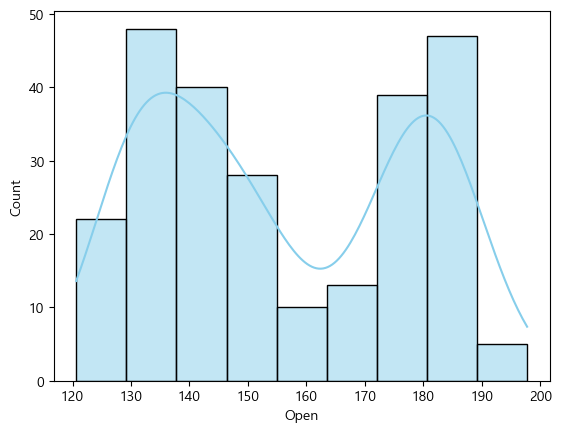

In [50]:
# kde=True -> 곡선 표현하기
sns.histplot(x = data['Open'], kde=True, color='Skyblue')
plt.show()

y축 기준

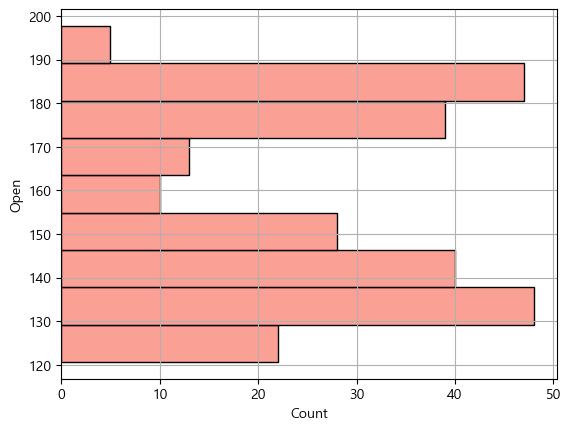

In [52]:
sns.histplot(y = data['Open'], color='Salmon')
# 그리드 추가하기
plt.grid(True)
plt.show()

막대 그래프로 빈도수 나타내기

In [62]:
data['Date'][:7]

0   2023-07-03
1   2023-07-05
2   2023-07-06
3   2023-07-07
4   2023-07-10
5   2023-07-11
6   2023-07-12
Name: Date, dtype: datetime64[ns]

C:\TempFolder\ipykernel_2032\277802367.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Date'][:7], palette='Set3')


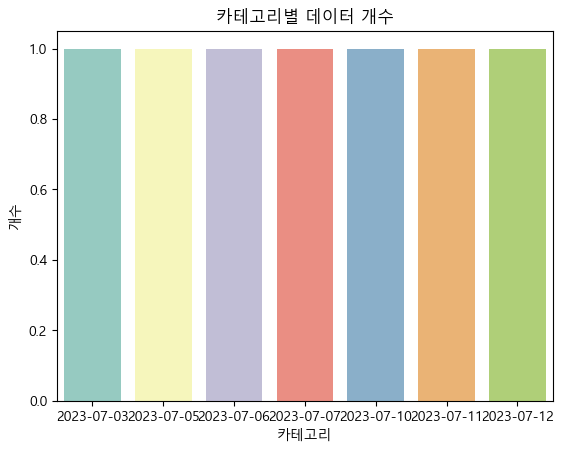

In [61]:
sns.countplot(x=data['Date'][:7], palette='Set3')
plt.title('카테고리별 데이터 개수')
plt.xlabel('카테고리')
plt.ylabel('개수')

plt.show()

선 그래프

In [42]:
# Date 값을 그래프에 표현 해주기 위해 Date 타입으로 변경
data['Date'] = pd.to_datetime(data['Date'])

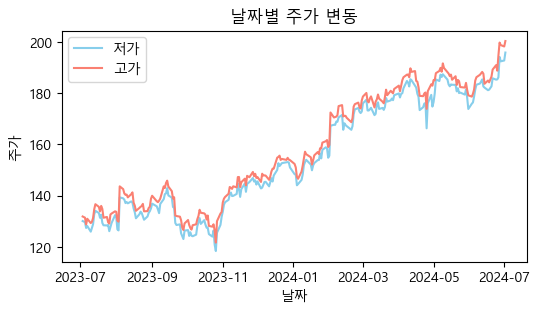

In [59]:
# Figure 객체 생성(가로 6, 높이 3)
plt.figure(figsize=(6, 3))

sns.lineplot(x=data['Date'], y=data['Low'], label='저가', color='Skyblue')
sns.lineplot(x=data['Date'], y=data['High'], label='고가', color='Salmon')

# 라벨 수정
plt.xlabel('날짜')
plt.ylabel('주가')
# 제목 지정
plt.title('날짜별 주가 변동')

plt.show()

2개의 그래프 한 번에 표현

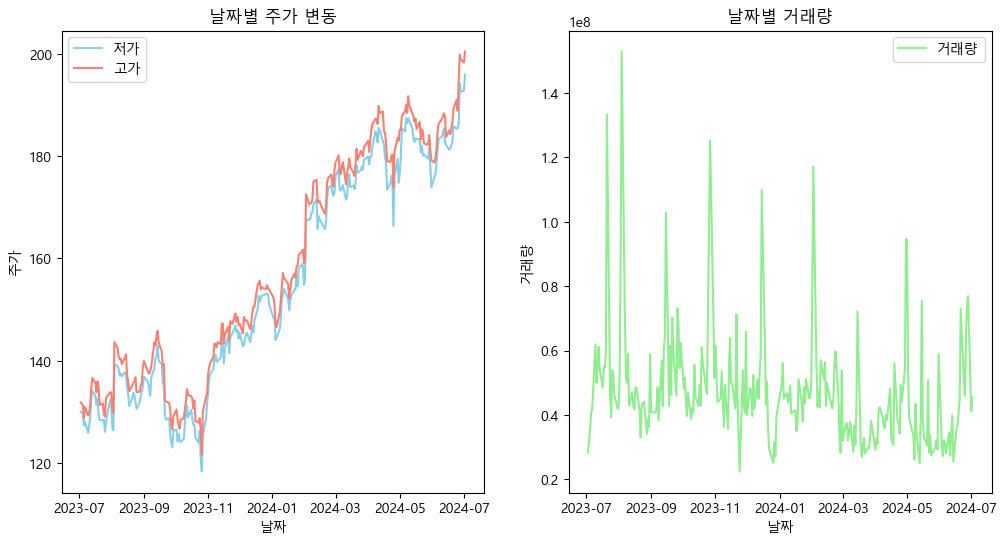

In [58]:
# Figure 객체 생성(가로 12, 높이 6인 그림 안에 두 개의 열로 배치된 서브플롯 생성)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# ax1 생성
sns.lineplot(x=data['Date'], y=data['Low'], label='저가', color='Skyblue', ax=ax1)
sns.lineplot(x=data['Date'], y=data['High'], label='고가', color='Salmon', ax=ax1)
ax1.set_title('날짜별 주가 변동')
ax1.set_xlabel('날짜')
ax1.set_ylabel('주가')


# ax2 생성
sns.lineplot(x=data['Date'], y=data['Volume'], label='거래량', color='Lightgreen', ax=ax2)
ax2.set_title('날짜별 거래량')
ax2.set_xlabel('날짜')
ax2.set_ylabel('거래량')


plt.show()

회귀선이 포함된 산점도 -> 컬럼 간의 관계를 보여줌

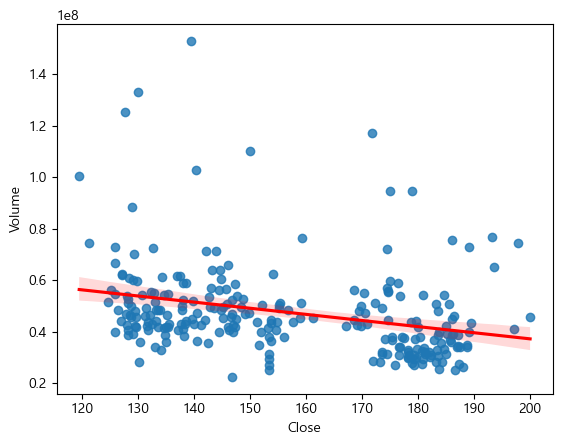

In [12]:
sns.regplot(x = data['Close'], y = data['Volume'], line_kws = {'color': 'red'})
plt.show()

상관관계 시각화

In [3]:
# 수치형 데이터만 추출
numeric_data = data.select_dtypes(include=['number'])
numeric_data.head()

,Open,High,Low,Close,Adj Close,Volume
0,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
1,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
3,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
4,129.070007,129.279999,125.919998,127.129997,127.129997,61889300


In [19]:
numeric_data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998474,0.998411,0.995771,0.995771,-0.290538
High,0.998474,1.000000,0.998578,0.998151,0.998151,-0.278884
Low,0.998411,0.998578,1.000000,0.998433,0.998433,-0.304030
Close,0.995771,0.998151,0.998433,1.000000,1.000000,-0.294393
Adj Close,0.995771,0.998151,0.998433,1.000000,1.000000,-0.294393
Volume,-0.290538,-0.278884,-0.304030,-0.294393,-0.294393,1.000000


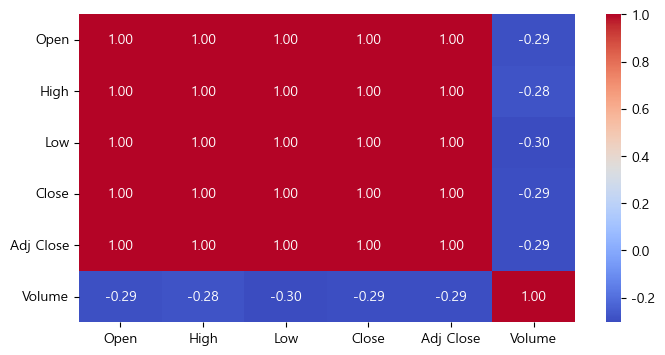

In [34]:
# 이미지 크기 지정
plt.figure(figsize=(8, 4))

# annot=True -> 각 셀의 수치 표기 O
# fmt -> 소수점 지정
# cmap -> 색 지정
ax = sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()